In [49]:
%matplotlib inline
import numpy as no
import matplotlib.pyplot as plt
import pandas as pd

### 讀進資料庫

In [50]:
from tensorflow.keras.datasets import mnist

In [51]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [52]:
x_train.shape

(60000, 28, 28)

### 目前只有一個channel，所以(28,28)→ (28,28,1)

In [53]:
x_train = x_train.reshape(60000,28,28,1)/255

In [54]:
x_test.shape

(10000, 28, 28)

In [55]:
x_test = x_test = x_test.reshape(10000,28,28,1)/255

### to_categorical = one_hot encoding

In [56]:
from tensorflow.keras.utils import to_categorical

In [57]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

### 讀入必要的函式

In [58]:
from tensorflow.keras.models import Sequential #數據機
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import SGD
# 用不同optimizers試試，ex:Adam

## Step1  打造函數學習機(CNN)

In [59]:
model = Sequential()

### 弄懂2D跟記分板的例子

In [60]:
model.add(Conv2D(16,(3,3),padding = "same",input_shape = (28,28,1),activation = "relu"))
# filter,(長相),padding = 'same'會使輸入、輸出時的矩陣大小相同，relu為最標準的activation function

### 輸出 16個28x28 矩陣
### 事實上是(28,28,16)，疊了16層!

In [61]:
model.add(MaxPooling2D(pool_size=(2,2)))

### (14,14,16) ：有16個channel ， 把 28x28切成一半

In [62]:
model.add(Conv2D(32,(3,3),padding = "same",activation = "relu"))

### output(14,14,32)，行列皆減半

In [63]:
model.add(MaxPooling2D(pool_size=(2,2)))

### 第二層的filter變成32=16*2

In [64]:
model.add(Conv2D(64,(3,3),padding = "same",activation = "relu"))

In [65]:
# output(14,14,32)

In [66]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [67]:
# output(7,7,32)

### 注意每層的filter要double：16-->32-->64

### Tensorflow 的拉平指令

In [68]:
model.add(Flatten())

In [69]:
model.add(Dense(54,activation = "relu")) # 數字不能改

In [70]:
model.add(Dense(10,activation = "softmax")) # 數字不能改

### 看一下我們的神經網路

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)              

In [75]:
# 160 = 16 * (3*3+1) 1 = bias
# (3*3*16+1)*32 ， 第2層filter=32個
# (3*3*32+1)*64=18496
# 576 = 26*26 = 13*2*13*2
#


## 有幾個計分板就會有幾個channel

In [80]:
model.compile(loss = "mse",optimizer=SGD(lr = 0.087),metrics=["accuracy"]) #第一組

### 嘗試新的loss function : MAE

In [82]:
model.compile(loss = "mae",optimizer=SGD(lr = 0.087),metrics=["accuracy"])#第二組

### 嘗試新的optimizer ：adam 

In [99]:
model.compile(loss = "mae",optimizer='adam',metrics=["accuracy"])

## step 2. fit

In [100]:
model.fit(x_train,y_train,batch_size=128,epochs=12)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 28s 467us/sample - loss: 0.0081 - accuracy: 0.9628
Epoch 2/12
60000/60000 [==============================] - 27s 454us/sample - loss: 0.0058 - accuracy: 0.9722
Epoch 3/12
60000/60000 [==============================] - 28s 472us/sample - loss: 0.0044 - accuracy: 0.9786- loss:
Epoch 4/12
60000/60000 [==============================] - 27s 447us/sample - loss: 0.0040 - accuracy: 0.9809
Epoch 5/12
60000/60000 [==============================] - 26s 438us/sample - loss: 0.0034 - accuracy: 0.9836
Epoch 6/12
60000/60000 [==============================] - 27s 455us/sample - loss: 0.0030 - accuracy: 0.9858
Epoch 7/12
60000/60000 [==============================] - 26s 431us/sample - loss: 0.0028 - accuracy: 0.9868
Epoch 8/12
60000/60000 [==============================] - 25s 414us/sample - loss: 0.0025 - accuracy: 0.9875
Epoch 9/12
60000/60000 [==============================] - 25s 419us/sample - loss: 0.0024 - accura

#### 第一組:loss = "mse",optimizer=SGD(lr = 0.087) → 439us/sample - loss: 0.0055 - accuracy: 0.9652
#### 第二組:loss = "mae",optimizer=SGD(lr = 0.087) → 387us/sample - loss: 0.0054 - accuracy: 0.9765 
#### 第三組:loss = "mae",optimizer='adam' → 428us/sample - loss: 0.0020 - accuracy: 0.9901

### batches = 每做幾題調整參數 ， epochs = 做幾次學習

In [56]:
### 自己更改 optimizer , loss function

## step 3.預測

In [87]:
result = model.predict_classes(x_test)

In [95]:
def my_predict(n):
    print("我可愛的CNN預測是",result[n])
    X = x_test[n].reshape(28,28)
    plt.imshow(X,cmap = "winter")

我可愛的CNN預測是 9


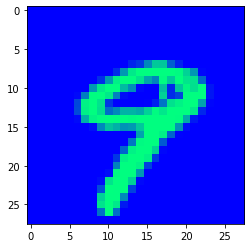

In [96]:
my_predict(9)

In [97]:
from ipywidgets import interact_manual

In [98]:
interact_manual(my_predict,n=(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

### 測試他有沒有背答案

In [101]:
score = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 176us/sample - loss: 0.0022 - accuracy: 0.9895


In [103]:
loss,acc = score

In [104]:
print("測試資料的正確率",acc)

測試資料的正確率 0.9895


In [105]:
model.save("myCNNmodel.h5")